In [1]:
import numpy as np
import matplotlib.pyplot as plt
import uproot

In [2]:
def data_plot(ax, X, BINW, DATA, ERRORLOW, ERRORUP, band=False, **kwargs):
    ax.errorbar(X, DATA, yerr= np.array([ERRORLOW,ERRORUP]), xerr = BINW/2.0, \
                            marker="o", markeredgewidth=0.5, capsize=1.0, markerfacecolor="black",\
                            markeredgecolor="black",ms=2, color='black', lw = 0.0, elinewidth=0.8, \
                            zorder=10, **kwargs)

In [3]:
def read_trigger_efficiencies(root_file_path):
    with uproot.open(root_file_path) as root_file:
        efficiency_tree = root_file["trigger_efficiencies_tree"]
        
        m_values = efficiency_tree["M"].array()
        n_values = efficiency_tree["N"].array()
        efficiencies = efficiency_tree["Efficiency"].array()
        efficiency_errors = efficiency_tree["EfficiencyError"].array()
        energies = efficiency_tree["Energy"].array()
        
        return m_values, n_values, efficiencies, efficiency_errors, energies

In [4]:
root_file_path = "/home/lane/Software/src/lumilar/system/analysis/data/trigger_efficiencies.root"
m_values, n_values, efficiencies, efficiency_errors, energies = read_trigger_efficiencies(root_file_path)

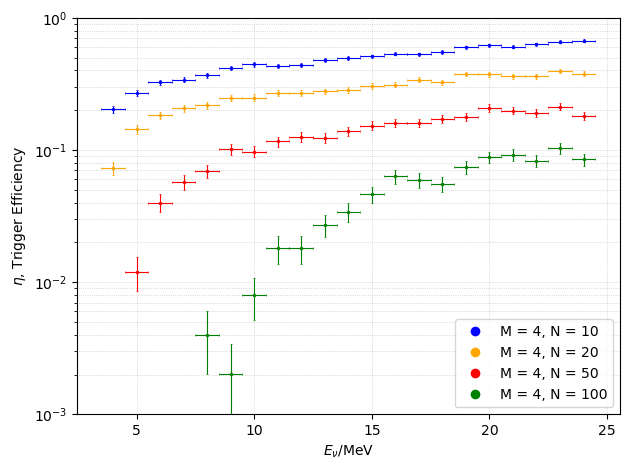

In [9]:
fig, ax = plt.subplots()

unique_combinations = set(zip(m_values, n_values))
colors = ['blue', 'red', 'green', 'orange']#plt.cm.get_cmap('tab10', len(unique_combinations))

color_mapping = {}
for i, comb in enumerate(unique_combinations):
    color_mapping[comb] = colors[i]

for i in range(len(energies)):
    efficiency = efficiencies[i]
    if efficiency > 0.002:  
        color = color_mapping[(m_values[i], n_values[i])]
        ax.errorbar(energies[i], efficiencies[i], yerr=efficiency_errors[i], xerr=1/2.0,
                marker="o", markeredgewidth=0.5, capsize=1.0, markerfacecolor=color,
                markeredgecolor=color, ms=2, color=color, lw=0.0, elinewidth=0.8,
                zorder=10)

sorted_combinations = sorted(unique_combinations, key=lambda comb: comb[1])

handles = [
    plt.Line2D([0], [0], marker='o', color='w', markersize=8,
               markerfacecolor=color_mapping[comb],
               label=f'M = {comb[0]}, N = {comb[1]}')
    for comb in sorted_combinations
]

legend = ax.legend(handles=handles, loc='lower right', fontsize=10)

ax.set_xlabel(r"$E_\nu/$MeV")
ax.set_ylabel(r"$\eta$, Trigger Efficiency")

ax.set_ylim(1e-3, 1)

ax.set_yscale('log')
ax.grid(which='both', linestyle=':', linewidth=0.5, color='gray', alpha=0.5)

plt.tight_layout()

plt.show()